In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import BernoulliNB
from sklearn import linear_model
from sqlalchemy import create_engine
import statsmodels.api as sm
import pandas_profiling
import warnings
import missingno as msno
from scipy.stats import boxcox

In [2]:
warnings.filterwarnings('ignore')

postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'houseprices'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))
houseprices_df = pd.read_sql_query('select * from houseprices',con=engine)

engine.dispose()


houseprices_df.head()

id  mssubclass mszoning  lotfrontage  lotarea street alley lotshape  \
0   1          60       RL         65.0     8450   Pave  None      Reg   
1   2          20       RL         80.0     9600   Pave  None      Reg   
2   3          60       RL         68.0    11250   Pave  None      IR1   
3   4          70       RL         60.0     9550   Pave  None      IR1   
4   5          60       RL         84.0    14260   Pave  None      IR1   

  landcontour utilities  ... poolarea poolqc fence miscfeature miscval mosold  \
0         Lvl    AllPub  ...        0   None  None        None       0      2   
1         Lvl    AllPub  ...        0   None  None        None       0      5   
2         Lvl    AllPub  ...        0   None  None        None       0      9   
3         Lvl    AllPub  ...        0   None  None        None       0      2   
4         Lvl    AllPub  ...        0   None  None        None       0     12   

  yrsold  saletype  salecondition  saleprice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

 # Data Cleaning and Exploration

In [3]:
houseprices_df_copy = houseprices_df.copy()

In [4]:
pandas_profiling.ProfileReport(houseprices_df)

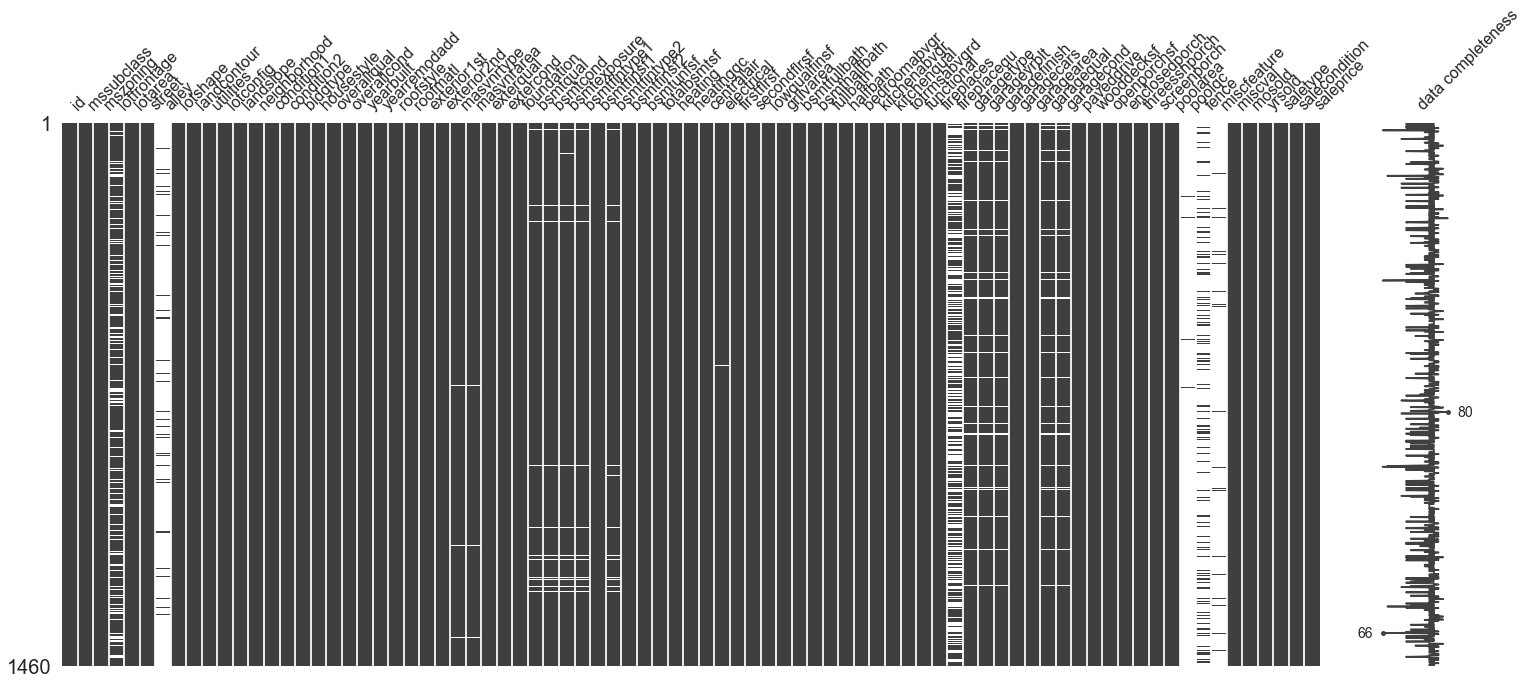

In [5]:
msno.matrix(houseprices_df_copy.sort_values('yrsold'), labels=True)
plt.show()

It seems that missing values from lotfrontage are missing completely at random. Even ordering the values by their most correlated category, the order of the missing data is spread out evenly. Lotfrontage is also is fairly normal so the missing values will be replaced with the mean.

In [6]:
houseprices_df_copy.iloc[:,3] = houseprices_df_copy.iloc[:,3].fillna(houseprices_df_copy.iloc[:,3].mean())

The masvrntype and masvrnarea 8 missing values match with each other. With 60% of the values being 0 and None respectively, it will be safe to fill these with those values.

In [7]:
houseprices_df_copy.iloc[:,25] = houseprices_df_copy.iloc[:,3].fillna(houseprices_df_copy.iloc[:,25].mode())
houseprices_df_copy.iloc[:,26] = houseprices_df_copy.iloc[:,3].fillna(houseprices_df_copy.iloc[:,26].mode())

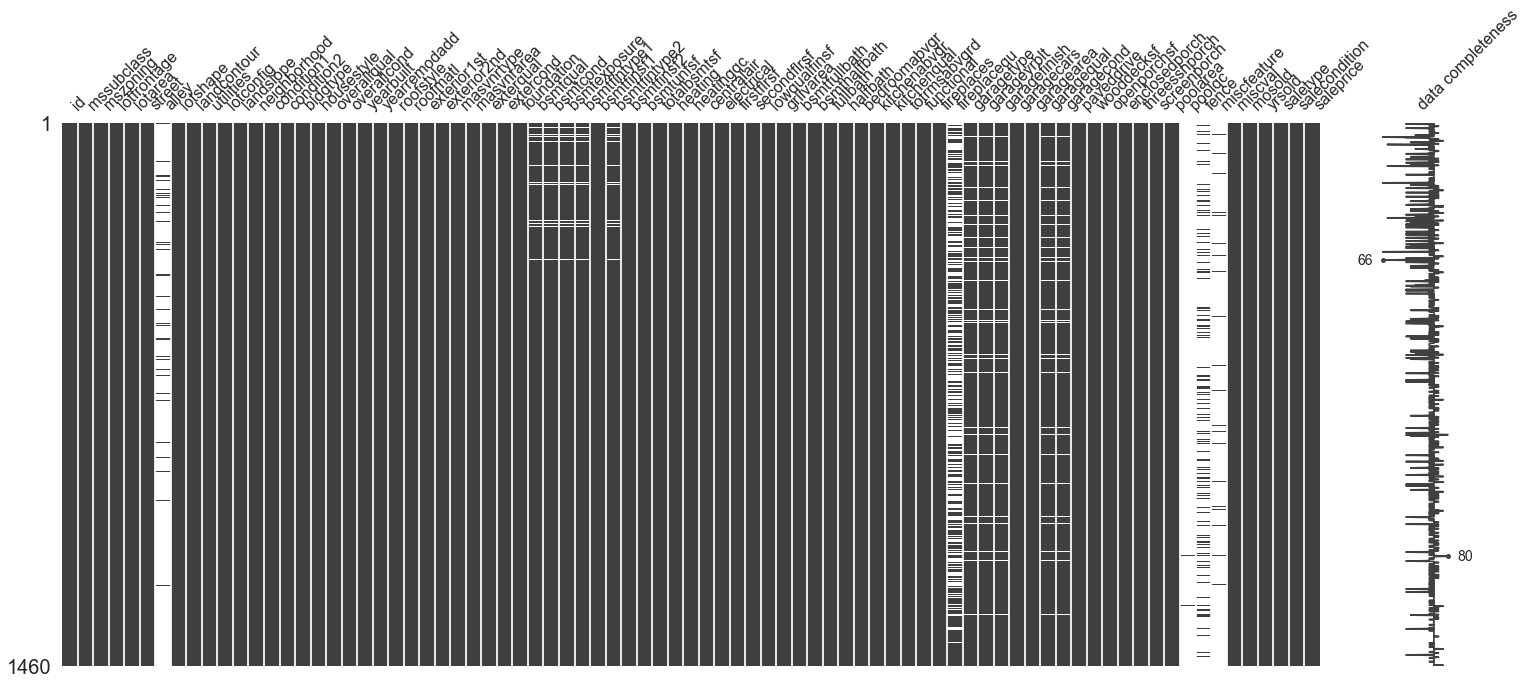

In [8]:
msno.matrix(houseprices_df_copy.sort_values('bsmtfinsf1'), labels=True)
plt.show()

In [9]:
houseprices_df_copy[houseprices_df_copy['bsmtqual'].isnull() == True].iloc[:,30:39]

bsmtqual bsmtcond bsmtexposure bsmtfintype1  bsmtfinsf1 bsmtfintype2  \
17       None     None         None         None           0         None   
39       None     None         None         None           0         None   
90       None     None         None         None           0         None   
100      None     None         None         None           0         None   
103      None     None         None         None           0         None   
157      None     None         None         None           0         None   
183      None     None         None         None           0         None   
260      None     None         None         None           0         None   
343      None     None         None         None           0         None   
363      None     None         None         None           0         None   
372      None     None         None         None           0         None   
393      None     None         None         None           0         None   
532      None     None         None         None           0         None   
533      None     None         None         None           0         None   
553      None     None         None         None           0         None   
646      None     None         None         None           0         None   
705      None     None         None         None           0         None   
736      None     None         None         None           0         None   
749      None     None         None         None           0         None   
778      None     None         None         None           0         None   
868      None     None         None         None           0         None   
894      None     None         None         None           0         None   
897      None     None         None         None           0         None   
984      None     None         None         None           0         None   
1000     None     None         None         None           0         None   
1011     None     None         None         None           0         None   
1035     None     None         None         None           0         None   
1045     None     None         None         None           0         None   
1048     None     None         None         None           0         None   
1049     None     None         None         None           0         None   
1090     None     None         None         None           0         None   
1179     None     None         None         None           0         None   
1216     None     None         None         None           0         None   
1218     None     None         None         None           0         None   
1233     None     None         None         None           0         None   
1321     None     None         None         None           0         None   
1412     None     None         None         None           0         None   

      bsmtfinsf2  bsmtunfsf  totalbsmtsf  
17             0          0            0  
39             0          0            0  
90             0          0            0  
100            0          0            0  
103            0          0            0  
157            0          0            0  
183            0          0            0  
260            0          0            0  
343            0          0            0  
363            0          0            0  
372            0          0            0  
393            0          0            0  
532            0          0            0  
533            0          0            0  
553            0          0            0  
646            0          0            0  
705            0          0            0  
736            0          0            0  
749            0          0            0  
778            0          0            0  
868            0          0            0  
894            0          0            0  
897            0          0            0  
984            0          0            0  
100

In [10]:
houseprices_df_copy.iloc[:,30] = houseprices_df_copy.iloc[:,3].fillna(houseprices_df_copy.iloc[:,30].mode())
houseprices_df_copy.iloc[:,31] = houseprices_df_copy.iloc[:,3].fillna(houseprices_df_copy.iloc[:,31].mode())
houseprices_df_copy.iloc[:,32] = houseprices_df_copy.iloc[:,3].fillna(houseprices_df_copy.iloc[:,32].mode())
houseprices_df_copy.iloc[:,33] = houseprices_df_copy.iloc[:,3].fillna(houseprices_df_copy.iloc[:,33].mode())
houseprices_df_copy.iloc[:,35] = houseprices_df_copy.iloc[:,3].fillna(houseprices_df_copy.iloc[:,35].mode())

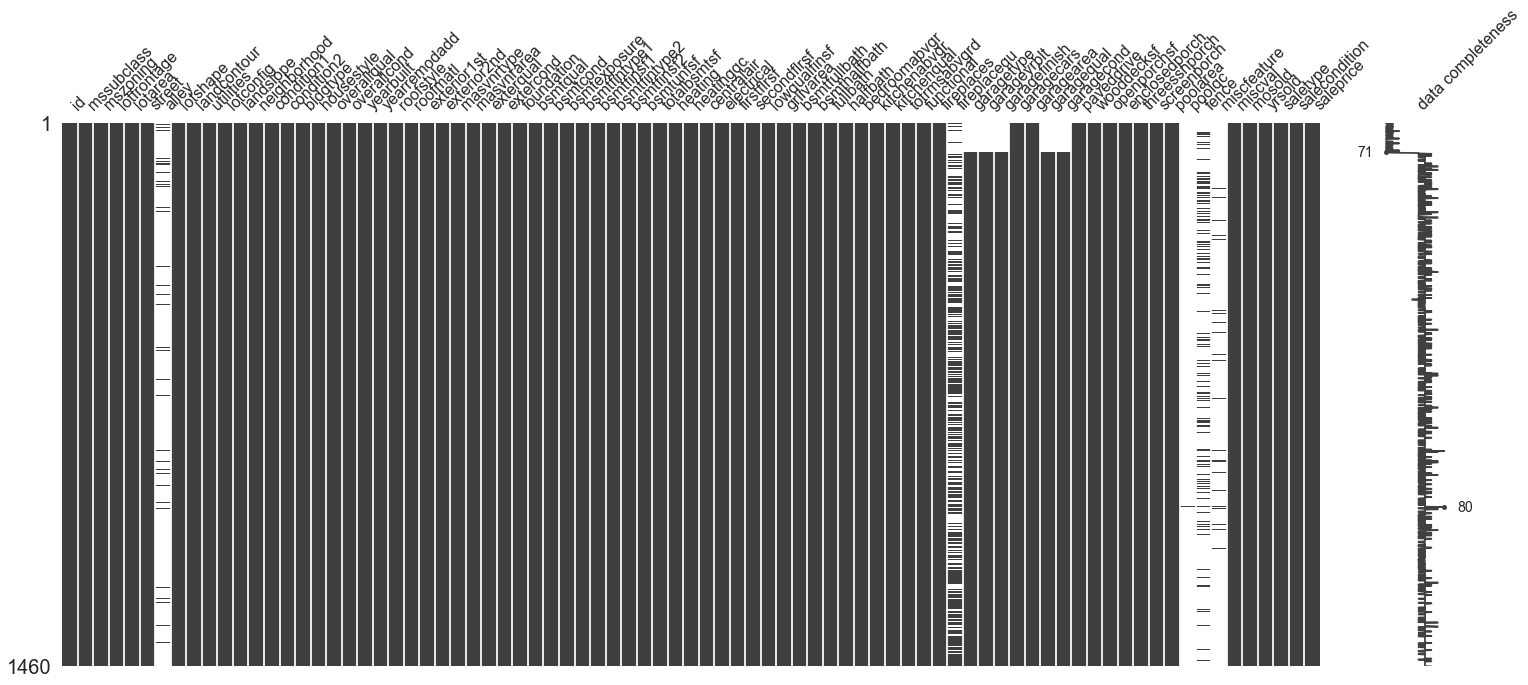

In [11]:
msno.matrix(houseprices_df_copy.sort_values('garagearea'), labels=True)
plt.show()

The values missing for the garage variables are due to the house not having one. Filling these blanks with 'None' will describe each value.

In [12]:
houseprices_df_copy.iloc[:,58] = houseprices_df_copy.iloc[:,58].fillna('None')
houseprices_df_copy.iloc[:,59] = houseprices_df_copy.iloc[:,59].fillna('None')
houseprices_df_copy.iloc[:,60] = houseprices_df_copy.iloc[:,60].fillna('None')
houseprices_df_copy.iloc[:,63] = houseprices_df_copy.iloc[:,63].fillna('None')
houseprices_df_copy.iloc[:,64] = houseprices_df_copy.iloc[:,64].fillna('None')

The other categories are made up of mostly missing values. Since we have so many variables, they can be ignored.

# Data Analysis and Feature Selection

In [13]:
houseprices_df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
id               1460 non-null int64
mssubclass       1460 non-null int64
mszoning         1460 non-null object
lotfrontage      1460 non-null float64
lotarea          1460 non-null int64
street           1460 non-null object
alley            91 non-null object
lotshape         1460 non-null object
landcontour      1460 non-null object
utilities        1460 non-null object
lotconfig        1460 non-null object
landslope        1460 non-null object
neighborhood     1460 non-null object
condition1       1460 non-null object
condition2       1460 non-null object
bldgtype         1460 non-null object
housestyle       1460 non-null object
overallqual      1460 non-null int64
overallcond      1460 non-null int64
yearbuilt        1460 non-null int64
yearremodadd     1460 non-null int64
roofstyle        1460 non-null object
roofmatl         1460 non-null object
exterior1st      1460 non-n

We need to get dummy variables for the categorical variables so we can analyze their correlation with our target variable.

In [15]:
obj_list = houseprices_df_copy.select_dtypes(['object']).columns
for column in obj_list:
    houseprices_df_copy = pd.concat([houseprices_df_copy, pd.get_dummies(houseprices_df_copy[column])], axis=1)

In [16]:
np.abs(houseprices_df_copy.corr().loc['saleprice']).sort_values(ascending = False).head(10)

saleprice       1.000000
overallqual     0.790982
grlivarea       0.708624
garagecars      0.640409
garagearea      0.623431
totalbsmtsf     0.613581
firstflrsf      0.605852
TA              0.589044
fullbath        0.560664
totrmsabvgrd    0.533723
Name: saleprice, dtype: float64

From this list, we will take our top 5 correlated factors. This will allow us the have a model that is not bloated with too many features.

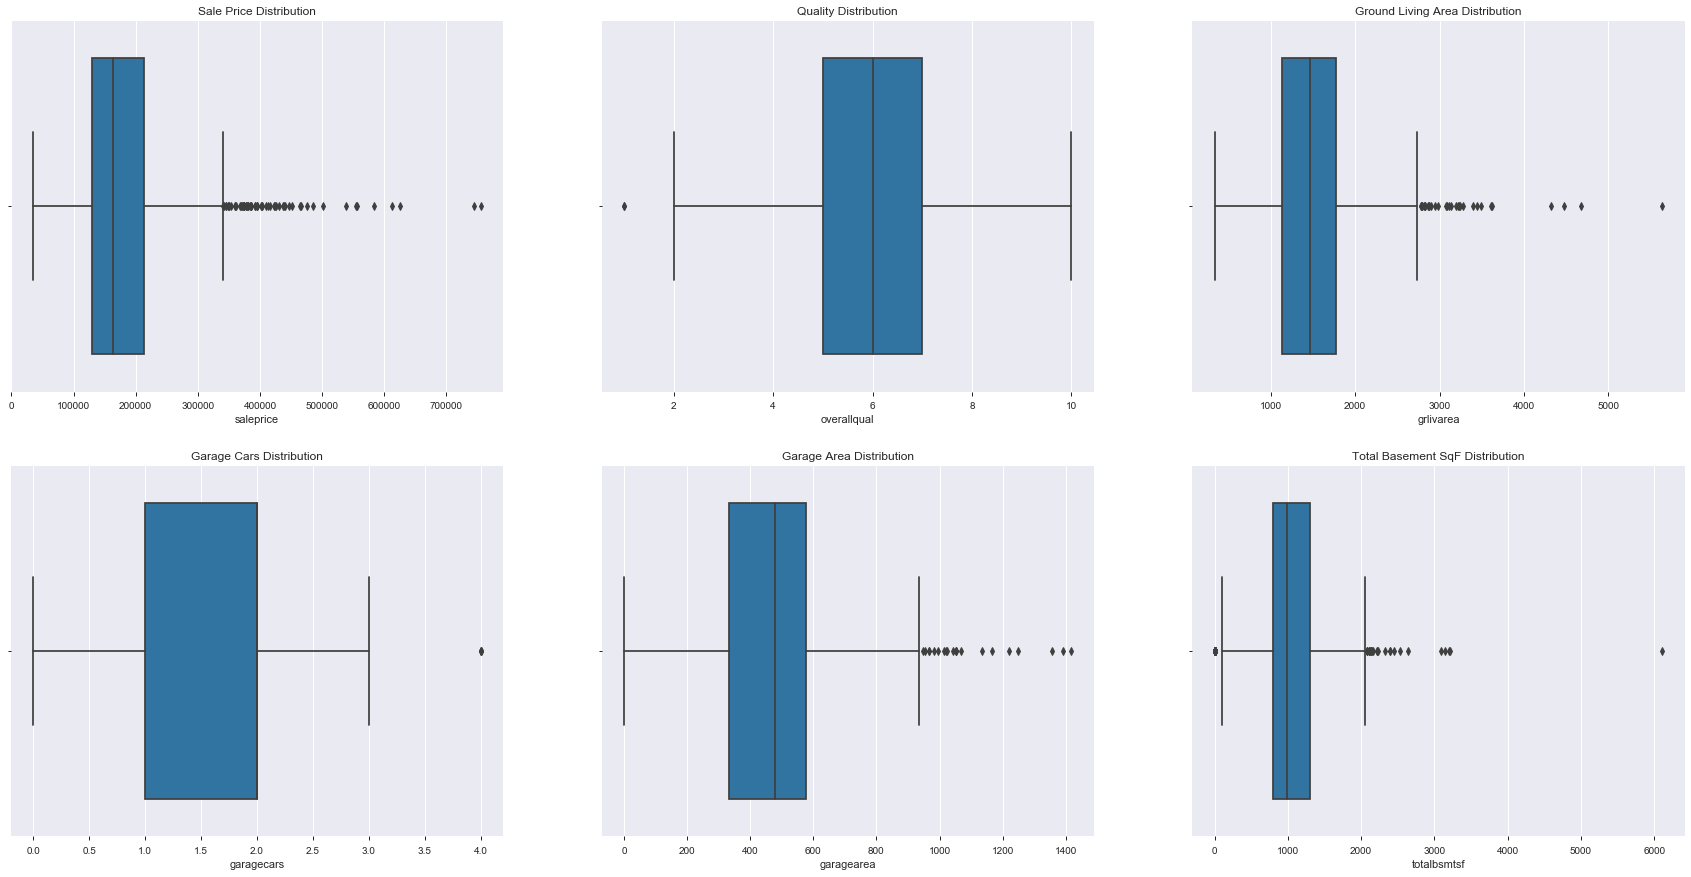

In [17]:
plt.figure(figsize = (30,15))

plt.subplot(2,3,1)
sns.boxplot(houseprices_df_copy['saleprice'])
plt.title('Sale Price Distribution')

plt.subplot(2,3,2)
sns.boxplot(houseprices_df_copy['overallqual'])
plt.title('Quality Distribution')

plt.subplot(2,3,3)
sns.boxplot(houseprices_df_copy['grlivarea'])
plt.title('Ground Living Area Distribution')

plt.subplot(2,3,4)
sns.boxplot(houseprices_df_copy['garagecars'])
plt.title('Garage Cars Distribution')

plt.subplot(2,3,5)
sns.boxplot(houseprices_df_copy['garagearea'])
plt.title('Garage Area Distribution')

plt.subplot(2,3,6)
sns.boxplot(houseprices_df_copy['totalbsmtsf'])
plt.title('Total Basement SqF Distribution')

plt.show()

In [18]:
houseprices_df_cnd = houseprices_df_copy.iloc[:,[80,17,46,61,62,38]]

To reduce the number of outliers and make our distributions more normal, we will Box-Cox our choosen variables.

In [19]:
houseprices_df_cnd.saleprice = boxcox(houseprices_df_cnd.saleprice)[0]
houseprices_df_cnd.overallqual = boxcox(houseprices_df_cnd.overallqual)[0]
houseprices_df_cnd.grlivarea = boxcox(houseprices_df_cnd.grlivarea)[0]
houseprices_df_cnd.loc[:, 'garagecars'] +=1
houseprices_df_cnd.garagecars = boxcox(houseprices_df_cnd.garagecars)[0]
houseprices_df_cnd.loc[:, 'garagearea'] +=1
houseprices_df_cnd.garagearea = boxcox(houseprices_df_cnd.garagearea)[0]
houseprices_df_cnd.loc[:, 'totalbsmtsf'] +=1
houseprices_df_cnd.totalbsmtsf = boxcox(houseprices_df_cnd.totalbsmtsf)[0]

In [20]:
houseprices_df_cnd.describe()

saleprice  overallqual    grlivarea   garagecars   garagearea  \
count  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean      7.842252     3.869071     7.437227     2.232050   177.651702   
std       0.158258     0.903027     0.349189     1.037222    70.006472   
min       7.185702     0.000000     5.918908     0.000000     0.000000   
25%       7.745006     3.162045     7.187632     1.145491   136.750899   
50%       7.835733     3.829085     7.459006     2.515980   183.588940   
75%       7.942749     4.470077     7.661848     2.515980   212.990807   
max       8.410162     6.276495     8.877540     5.737615   443.308535   

       totalbsmtsf  
count  1460.000000  
mean    227.656989  
std      72.724356  
min       0.000000  
25%     187.805957  
50%     221.178164  
75%     270.225865  
max     852.174681

In [21]:
for columns in houseprices_df_cnd.columns:
    print('The variance in {} is {}'.format(columns,houseprices_df_cnd[columns].var()))

The variance in saleprice is 0.02504543700301288
The variance in overallqual is 0.8154573791215237
The variance in grlivarea is 0.1219327672530901
The variance in garagecars is 1.075829292224137
The variance in garagearea is 4900.906059605023
The variance in totalbsmtsf is 5288.831956285196


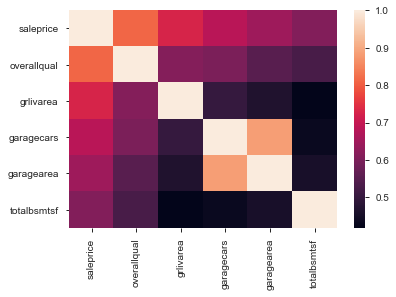

In [22]:
sns.heatmap(houseprices_df_cnd.corr())
plt.show()

In [23]:
houseprices_df_cnd.corr()

saleprice  overallqual  grlivarea  garagecars  garagearea  \
saleprice     1.000000     0.813817   0.729385    0.683774    0.647222   
overallqual   0.813817     1.000000   0.613595    0.602496    0.552459   
grlivarea     0.729385     0.613595   1.000000    0.501673    0.468079   
garagecars    0.683774     0.602496   0.501673    1.000000    0.885910   
garagearea    0.647222     0.552459   0.468079    0.885910    1.000000   
totalbsmtsf   0.610857     0.529373   0.418899    0.434136    0.456263   

             totalbsmtsf  
saleprice       0.610857  
overallqual     0.529373  
grlivarea       0.418899  
garagecars      0.434136  
garagearea      0.456263  
totalbsmtsf     1.000000

Here we see that garagacars and garagearea are highly correlated. We will drop garagecars since they are similar in their correlation to saleprice but garagearea has more variance. We will also add in firstflrsf as an extra feature.

In [24]:
houseprices_df_cnd = houseprices_df_cnd.drop(columns = ('garagecars'))

In [25]:
houseprices_df_cnd['firstflrsf'] = (houseprices_df_copy.firstflrsf)

In [26]:
houseprices_df_cnd.firstflrsf = boxcox(houseprices_df_cnd.firstflrsf)[0]

# Regression

In [27]:
Y = houseprices_df_cnd.saleprice
X = houseprices_df_cnd.iloc[:,1:]

X = sm.add_constant(X)

results = sm.OLS(Y, X).fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              saleprice   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.802
Method:                 Least Squares   F-statistic:                     1182.
Date:                Sun, 06 Oct 2019   Prob (F-statistic):               0.00
Time:                        15:15:23   Log-Likelihood:                 1804.9
No. Observations:                1460   AIC:                            -3598.
Df Residuals:                    1454   BIC:                            -3566.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           6.0671      0.079     77.227      0.000       5.913       6.221
overallqual     0.0783      0.003     26.420      0.000       0.072       0.084
grlivarea       0.1256      0.007     17.048      0.000       0.111       0.140
garagearea      0.0004   3.34e-05     12.057      0.000       0.000       0.000
totalbsmtsf     0.0002   4.07e-05      5.968      0.000       0.000       0.000
firstflrsf      0.0764      0.017      4.594      0.000       0.044       0.109
==============================================================================
Omnibus:                      658.825   Durbin-Watson:                   1.979
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7634.366
Skew:                          -1.788   Prob(JB):                         0.00
Kurtosis:                      13.616   Cond. No.                     1.30e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.3e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Gauss Markov Conditions

### Condition 1

With the model being correctly built, the model seems linear with respect to the coefficients in the model.

### Condition 2

In [28]:
lrm = linear_model.LinearRegression()
lrm.fit(X, Y)


predictions = lrm.predict(X)
errors = Y - predictions
errors.mean()

-7.239262461939377e-17

The mean error is essentially 0.

### Condition 3

In [29]:
from scipy.stats import bartlett
from scipy.stats import levene

bart_stats = bartlett(predictions, errors)
lev_stats = levene(predictions, errors)

print("Bartlett test statistic value is {0:3g} and p value is {1:.3g}".format(bart_stats[0], bart_stats[1]))
print("Levene test statistic value is {0:3g} and p value is {1:.3g}".format(lev_stats[0], lev_stats[1]))

Bartlett test statistic value is 665.361 and p value is 1.02e-146
Levene test statistic value is 569.224 and p value is 4.4e-115


According to both tests, we reject the null-hypothesis of homoscedasticity. Therefore, there is some overconfidence in our model's accuracy.

### Condition 4

In [30]:
houseprices_df_cnd.corr()

saleprice  overallqual  grlivarea  garagearea  totalbsmtsf  \
saleprice     1.000000     0.813817   0.729385    0.647222     0.610857   
overallqual   0.813817     1.000000   0.613595    0.552459     0.529373   
grlivarea     0.729385     0.613595   1.000000    0.468079     0.418899   
garagearea    0.647222     0.552459   0.468079    1.000000     0.456263   
totalbsmtsf   0.610857     0.529373   0.418899    0.456263     1.000000   
firstflrsf    0.606968     0.449074   0.544452    0.474162     0.742466   

             firstflrsf  
saleprice      0.606968  
overallqual    0.449074  
grlivarea      0.544452  
garagearea     0.474162  
totalbsmtsf    0.742466  
firstflrsf     1.000000

Here, many features have a medium correlation. This leads to an underestimate of the relationship between the features and outcome.

### Condition 5

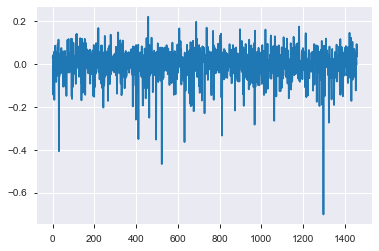

In [31]:
plt.plot(errors)
plt.show()

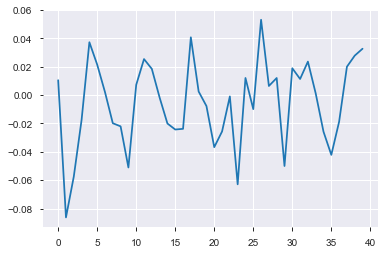

In [32]:
from statsmodels.tsa.stattools import acf

acf_data = acf(errors)

plt.plot(acf_data[1:])
plt.show()

According to the autocorrelation function, the errors are not correlated.

### Condition 6

In [33]:
houseprices_df_cnd['errors'] = errors
houseprices_df_cnd.corr().errors

saleprice      4.442772e-01
overallqual    3.011352e-14
grlivarea      2.289852e-14
garagearea     2.392757e-14
totalbsmtsf    3.527604e-14
firstflrsf     2.794883e-14
errors         1.000000e+00
Name: errors, dtype: float64

According to the correlation values, none of the features are correlated with the errors.